# Проект 3. Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

Необходимо провести исследование, которое позволит выявить влияние различных факторов на себестоимость квартиры/дома. 

**Задачи исследования :**
* Задача 1.Какие значения принимают: общая площадь, общая цена жилья, количество комнат, высота потолка, жилая площадь, площадь кухни, этаж квартиры, тип этажа квартиры, общее количество этажей, расстояние до центра города , расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления
* Задача 2.За какое количество дней обычно продаётся квартира/дом?Какие продажи можно считать быстрыми, а какие медленными?
* Задача 3.Влияние на общую стоимость жилья жилья следующих факторов:
 * квадратный метр жилья
 * площадь кухни
 * тип этажа, на котором расположено жильё
 * количество комнат
 * дата размещения 
* Задача 3.1. 
 * Как связаны между собой общая стоимость и следующие площади : общая, жилая, кухни?
 * Как менялись эти площади за дни недели, месяцы, годы? 
* Задача 4.В каких населённых пунктах дороже всего обходится квадратный метр жилья?
* Задача 5.Как связаны между собой квадратый метр жилья и расстояние жилья от центра города?

**Ход исследования:**
* 1.Открыть файл (real_estate_data.csv) и изучить общую информацию
* 2.Провести предобработку данных
* 3.Добавить в таблицу новые столбцы со следующими параметрами:
  * цена одного квадратного метра;
  * день недели публикации объявления;месяц публикации объявления;
  * год публикации объявления;
  * тип этажа квартиры 
  * расстояние до центра города в километрах 
* 4.Исследовательский анадиз данных: выполнение поставленных задач
* 5.Общий вывод

## Открытие файла и изучение общей информации

In [3]:
import pandas as pd 
import numpy as np

In [8]:
try:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
except:
    df=pd.read_csv('real_estate_data.csv',sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info"> <b>Построение общей гистограммы</b></div>

<function matplotlib.pyplot.show(close=None, block=None)>

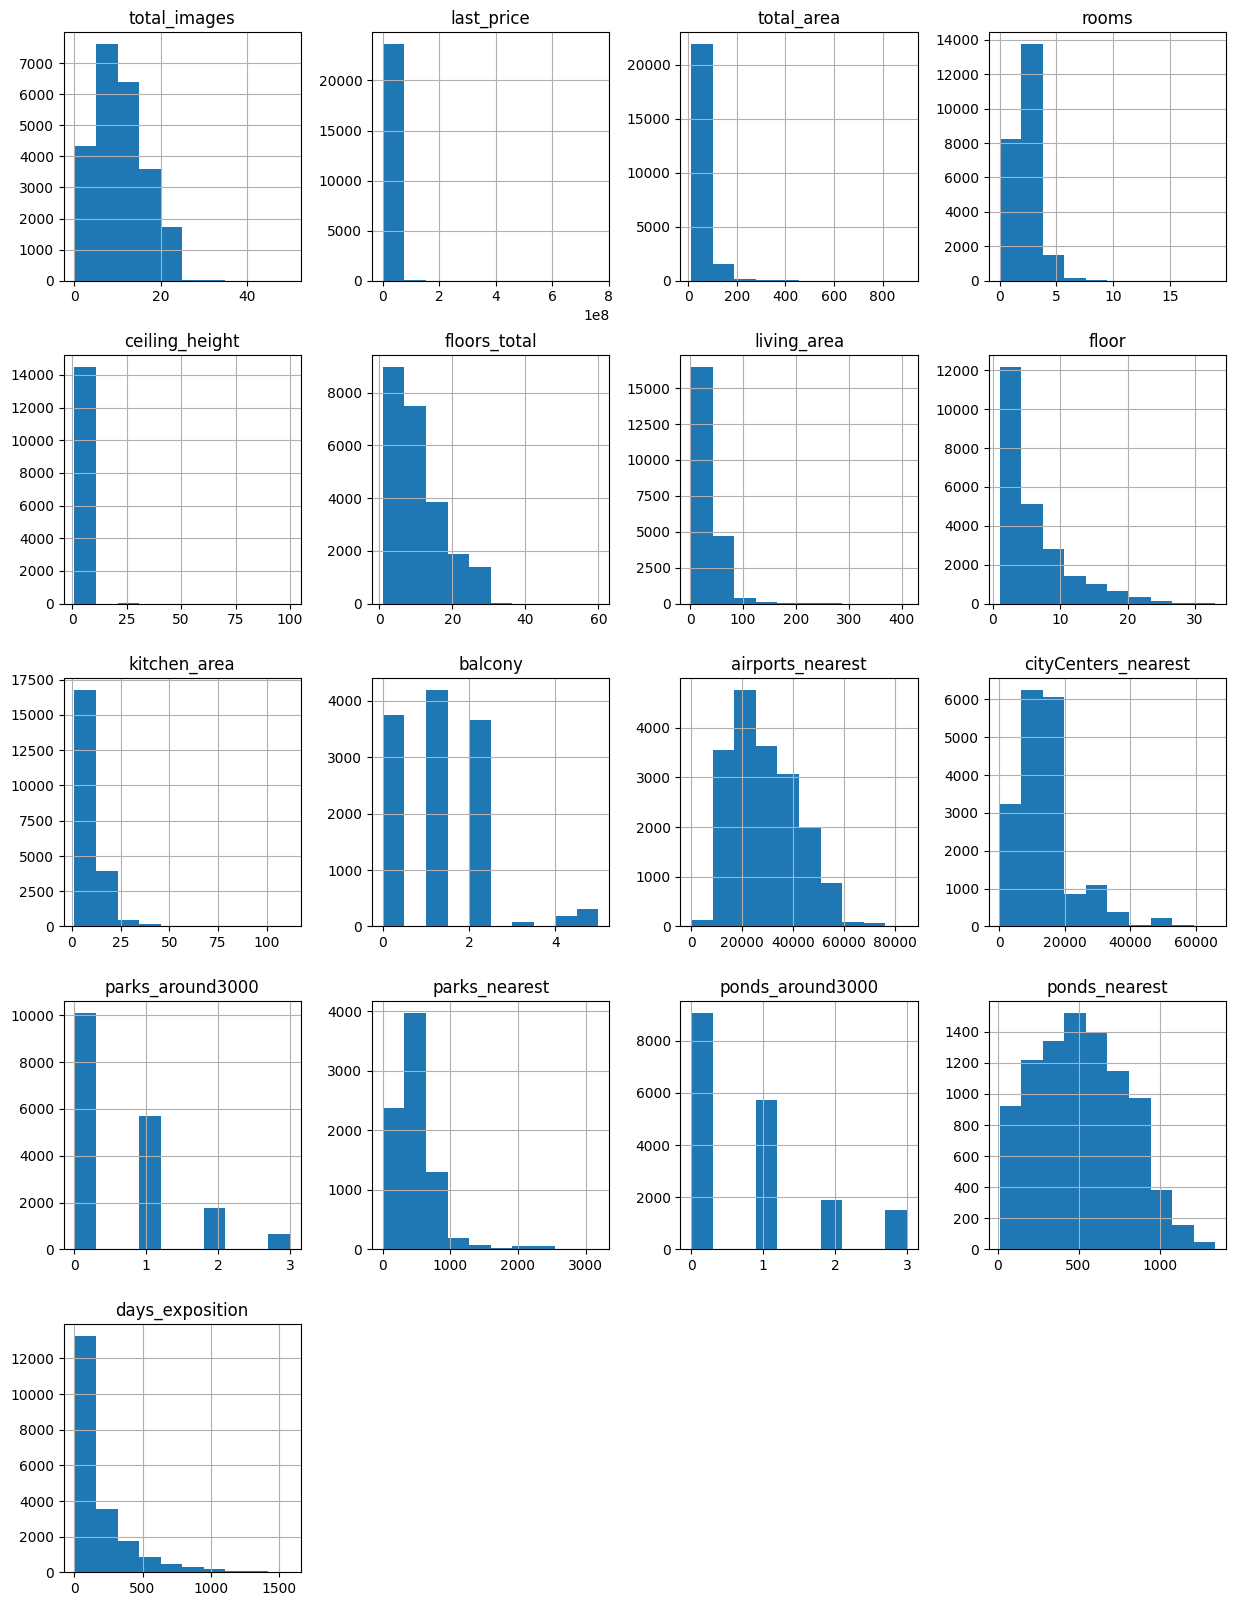

In [9]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,20))
plt.show

## Предобработка данных

In [3]:
df=df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

### Группировка названий населённых пунктов

In [4]:
df['locality_name']=df['locality_name'].replace('nan','noname')


In [5]:
def categorize_name(row):
    try:
        if 'пос'in row and 'город' in row:
            return 'посёлок городского типа'
        elif 'пос'in row :
            return 'посёлок'
        elif 'дерев' in row:
            return 'деревня'
        elif 'пос'in row and 'коттедж' in row:
            return 'коттеджный посёлок'
        elif 'садовое' in row:
            return 'садовое товарищество'
        elif 'noname' in row:
            return 'неизвестно'
        elif 'село' in row:
            return 'село'
        else : 
            return 'город'
        
    except:
        return 'нет названия'

In [6]:
df['name_category'] = df['locality_name'].apply(categorize_name)

In [7]:
df['name_category'].unique()

array(['город', 'посёлок', 'посёлок городского типа', 'деревня',
       'садовое товарищество', 'село', 'нет названия'], dtype=object)

In [8]:
df.groupby('name_category')['locality_name'].count()

name_category
город                      20009
деревня                      945
нет названия                   0
посёлок                     2104
посёлок городского типа      556
садовое товарищество           4
село                          32
Name: locality_name, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Пропуски в значениях

In [10]:
#Лучше заполнить пропущенные значения медианой
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

In [11]:
#Значит нет этажей в доме
df['floors_total']=df['floors_total'].fillna(0).astype('int')

In [12]:
#Значит не имеется балкона
df['balcony'].fillna(0).astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

<div class="alert alert-info"> <b>Перезапись переменной</b> </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно
</div>

In [13]:
df['balcony']=df['balcony'].fillna(0).astype('int')

In [14]:
#Для удобства заменяем True на 1 и False на 0
df['studio']=~df['studio'].isna()*1
df['open_plan']=~df['open_plan'].isna()*1

In [15]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [16]:
#Лучше заполнить неизвестные этажи медианой
df['floor']=df['floor'].fillna(df['floor'].median())

In [17]:
#Лучше заполнить неизвестные площади кухонь медианой
df['kitchen_area']=df['kitchen_area'].fillna(df['kitchen_area'].median())

In [18]:
#Лучше заполнить расстояние до центра города нулевыми значениями
df['city_centers_nearest']=df['city_centers_nearest'].fillna(0)

<div class="alert alert-info"> <b>Обратим внимание на следующую часть кода.Как видим, количество пропущенных значений 15620. Возникает мысль заполнить все оставшиеся значения медианой, но вот из-за того, что так много пропусков, после заполнения медианой в нижнем и вверхнем квартиле получаются значения 455. Нужно чем-то ещё заполнить пропуски? Или же можно так оставить?</b> 

In [19]:
(df['parks_nearest'].isna()*1).sum()

15620

In [20]:
#Лучше заполнить расстояние до ближайшего парка медианой
#df['parks_nearest']=df['parks_nearest'].fillna(df['parks_nearest'].median()) 
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

*****

In [21]:
#Заменим пропуски в days_exposition и заменим тип данных
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

<div class="alert alert-info"> <b>Изменение на корректный тип данных в столбцах и добавление значений</b> 

In [22]:
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  0, 20, 28, 36, 21, 35, 34, 60,  1, 29,
       33, 52, 37])

По-моему, в этом столбце и не было дробных значений

In [23]:
df['floors_total']=df['floors_total'].astype('int')

In [24]:
df['airports_nearest']=df['airports_nearest'].fillna(df['airports_nearest'].median())      

In [25]:
df['airports_nearest']=df['airports_nearest'].astype('int')

<div class="alert alert-info"> <b>Устранение аномалий в ceiling_height</b> 

(0.0, 5.0)

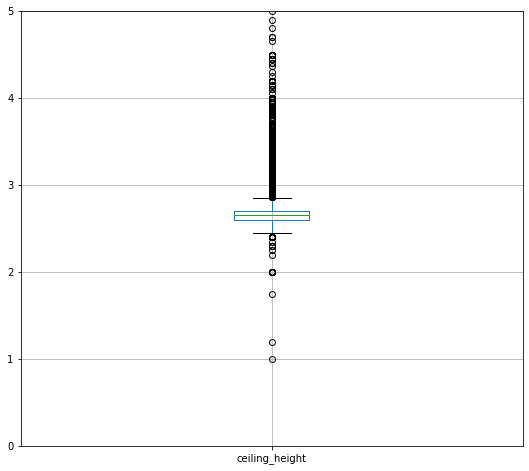

In [26]:
column=['ceiling_height']
ax5=df.boxplot(column, grid=True, figsize=(9,8))
ax5.set_ylim(0,5)


In [28]:
#В соответствии со здравым смыслом, медианное значение высоты потолков, равное 3, имеет место быть
df['ceiling_height'].median()

2.65

<div class="alert alert-info"> Сделав срез в ceiling_hight и заполнение медианным значением, мы смогли устранить явные дубликаты, выбросы, аномалии</b> 

In [30]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

<div class="alert alert-info"> <b>Обработка аномалий в столбце "высота потолков"</b> 

(0.0, 40.0)

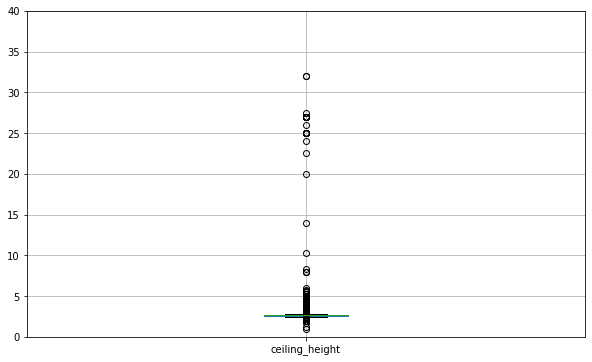

In [31]:
column=['ceiling_height']
df.boxplot(column, figsize=(10,6))
plt.ylim(0,40)

In [35]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

<div class="alert alert-info">Обработка аномалий в столбце "высота потолков"(2)</b> 

In [36]:
#Судя по представленным данным, стоит посчитать за аномальные значения высоты потолков, высота которых больше 20 м
df.loc[df['ceiling_height'] >= 10.0, 'ceiling_height'] = df['ceiling_height']/10

In [37]:
#Проверка
df['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [38]:
#Заполним недостоющие значения медианой
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="Удаление явных дубликатов 2.0"</b> </div>

<div class="alert alert-info">Удаление явных дубликатов</b> 

In [40]:
df.drop_duplicates(subset=['ceiling_height'],inplace=True)

In [41]:
df['ceiling_height'].duplicated().sum()

0

<div class="alert alert-info">Проверка на неявные дубликаты</b> 

In [42]:
df.duplicated().sum()

0

**Вывод**: как мы видим, незаполнено большое количество данных, а также имеются ошибки сделанные за счёт невнимательности

**Опишем самые выделяющиеся столбцы**
* ceiling_height: огромный разброс данных, начиная с 0 и до 100; большое количество пропусков( заполнено около 3500 ячеек из 23699)
* locality_name : присутствуют орфографические "неточности", например, человек воспринимает посёлок и поселок за одно слово, но машина - за разные
* city_centers_nearest : 18180 значений из 23699
* parks_nearest: 8079 из 23699
* имелись столбцы с неверным типом данных:
    * first_day_exposition
    * floors_total
    * airports_nearest
    * balcony

## Добавление в таблицу новых столбцов

In [43]:
#Цена одного квадратного метра
df['price_piece_area']=round(df['last_price']/df['total_area'])

In [44]:
#День недели публикации объявления
df['week_day_publication']=df['first_day_exposition'].dt.day_name()

In [45]:
#Месяц публикации объявления
df['month_publucation']=df['first_day_exposition'].dt.month_name()

In [46]:
#Год публикации объявления
df['year_publication']=df['first_day_exposition'].dt.year

<div class="alert alert-info">Добавим столбцы с нумерацией значений дат</b> 

In [47]:
df['week_day_publication_2']=df['first_day_exposition'].dt.strftime('%d')
df['month_publucation_2']=df['first_day_exposition'].dt.strftime('%m')
df['year_publication_2']=df['first_day_exposition'].dt.strftime('%y')

In [48]:
df['week_day_publication_2']=df['week_day_publication_2'].astype('int')

In [49]:
df['week_day_publication_2'].unique()

array([ 7,  4, 19, 26, 16,  1, 23,  9, 29, 13, 10, 17, 28, 21,  6,  8, 30,
       11, 22, 12, 15, 24, 14,  2, 27, 25, 18,  3, 20, 31,  5])

In [50]:
df['week_day_publication_2']=df['week_day_publication_2'].replace([8,15,22,29],1)
df['week_day_publication_2']=df['week_day_publication_2'].replace([9,16,23,30],2)
df['week_day_publication_2']=df['week_day_publication_2'].replace([10,17,24,31],3)
df['week_day_publication_2']=df['week_day_publication_2'].replace([11,18,25],4)
df['week_day_publication_2']=df['week_day_publication_2'].replace([12,19,26],5)
df['week_day_publication_2']=df['week_day_publication_2'].replace([13,20,27],6)
df['week_day_publication_2']=df['week_day_publication_2'].replace([14,21,28],7)

In [51]:
df['week_day_publication_2'].unique()

array([7, 4, 5, 2, 1, 6, 3])

In [52]:
#Расстояние до центра города в километрах
df['city_centers_nearest_km']=round(df['city_centers_nearest']/1000)
df['city_centers_nearest_km']=df['city_centers_nearest_km'].astype('int')

In [53]:
#Тип этажа квартиры
def categorize_floor(row):
        floor=row['floor']
        floors_total=row['floors_total']
        if floor == 1:
            return 'первый'
        elif floor==floors_total:
            return 'последний'
        elif 1< floor <floors_total:
            return 'другое'

In [54]:
df['name_floor']=df.apply(categorize_floor, axis = 1)

## Проведите исследовательский анализ данных

### Проведём первоначальный анализ**

In [55]:
df[['total_area','last_price','rooms','ceiling_height','floor']].describe()

,total_area,last_price,rooms,ceiling_height,floor
count,176.000000,1.760000e+02,176.000000,176.000000,176.000000
mean,104.277784,1.781044e+07,2.965909,3.365852,4.710227
std,82.842615,2.643100e+07,1.888000,1.074074,4.028627
min,22.500000,5.500000e+05,0.000000,1.000000,1.000000
25%,51.950000,5.387500e+06,2.000000,2.767500,2.000000
50%,73.000000,8.335000e+06,3.000000,3.215000,4.000000
75%,125.675000,1.646000e+07,4.000000,3.682500,6.000000
max,495.000000,1.599840e+08,14.000000,10.000000,26.000000


**Вывод:**
* существуют выбросы в данных
* величины кажутся зависимыми:увеличением площади увеличиваются цена,комнаты
* данные,вроде, выглядят здраво, то есть подходят под любые категории: присутствует квартира(или дом) ценой в 763 млн, также ценой в 12190 руб,возможно это цена снятия комнаты в месяц;комнаты от 0(как уже было сказано,комната) и до 19. Потолки от 1 метра и до 100(какой-то склад);этажи от 1 и до 33

### Определение выбросов в представленных столбцах**

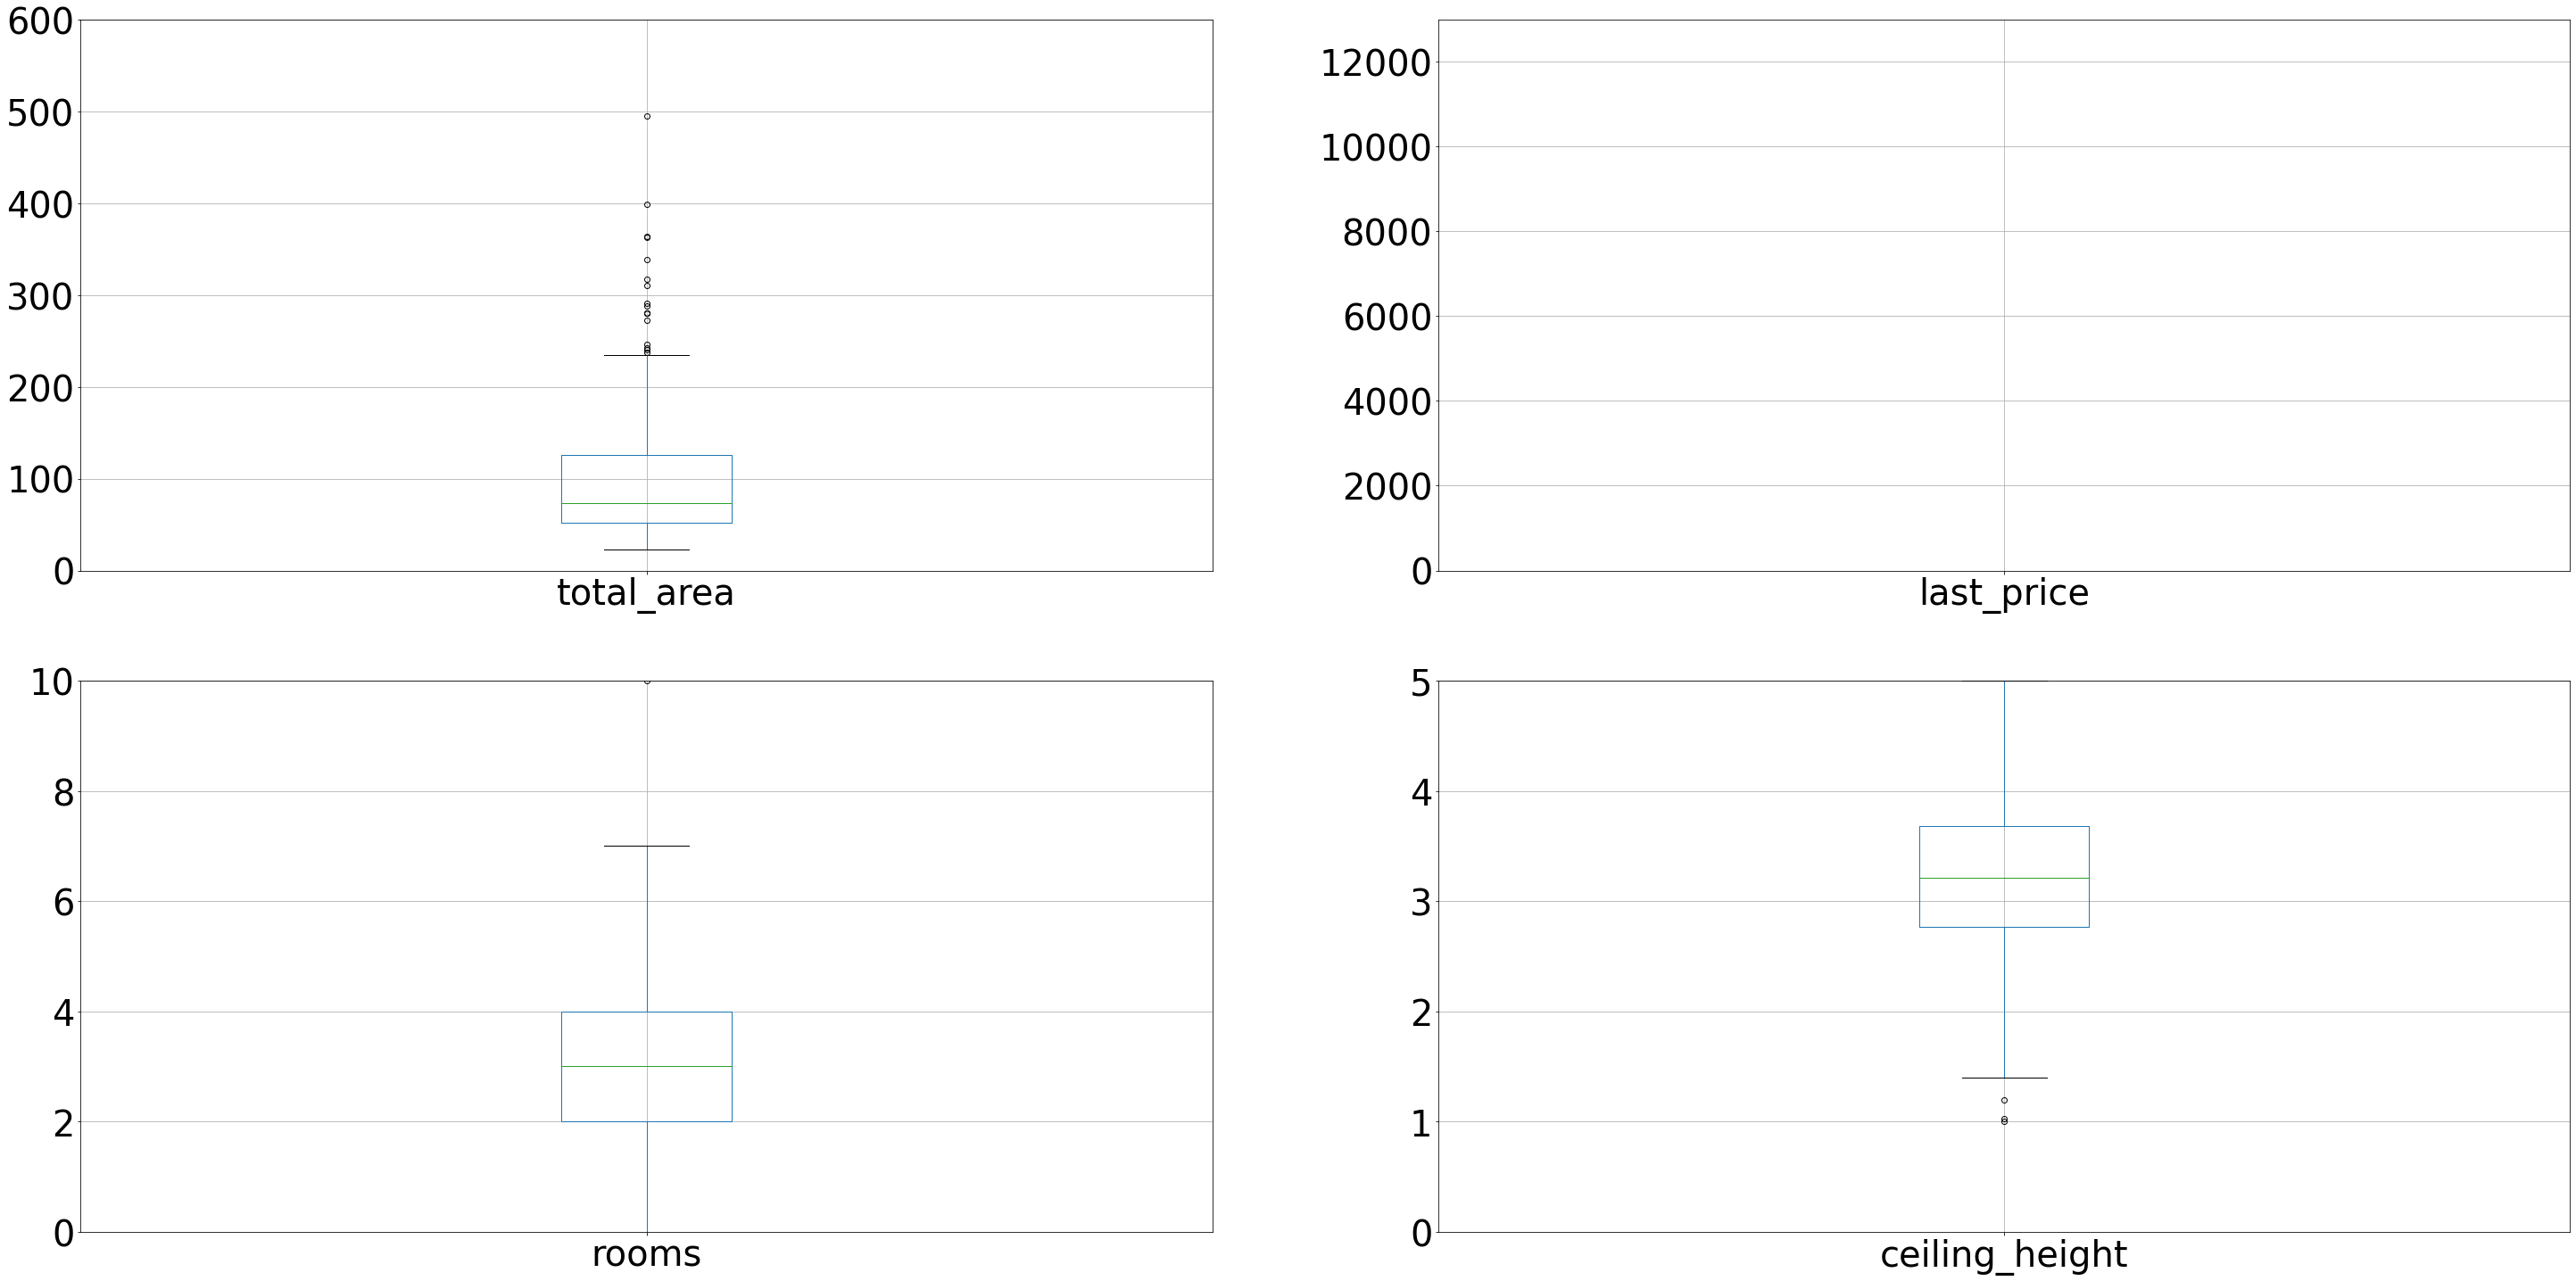

In [56]:
import matplotlib.pyplot as plt
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols,figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count+=1

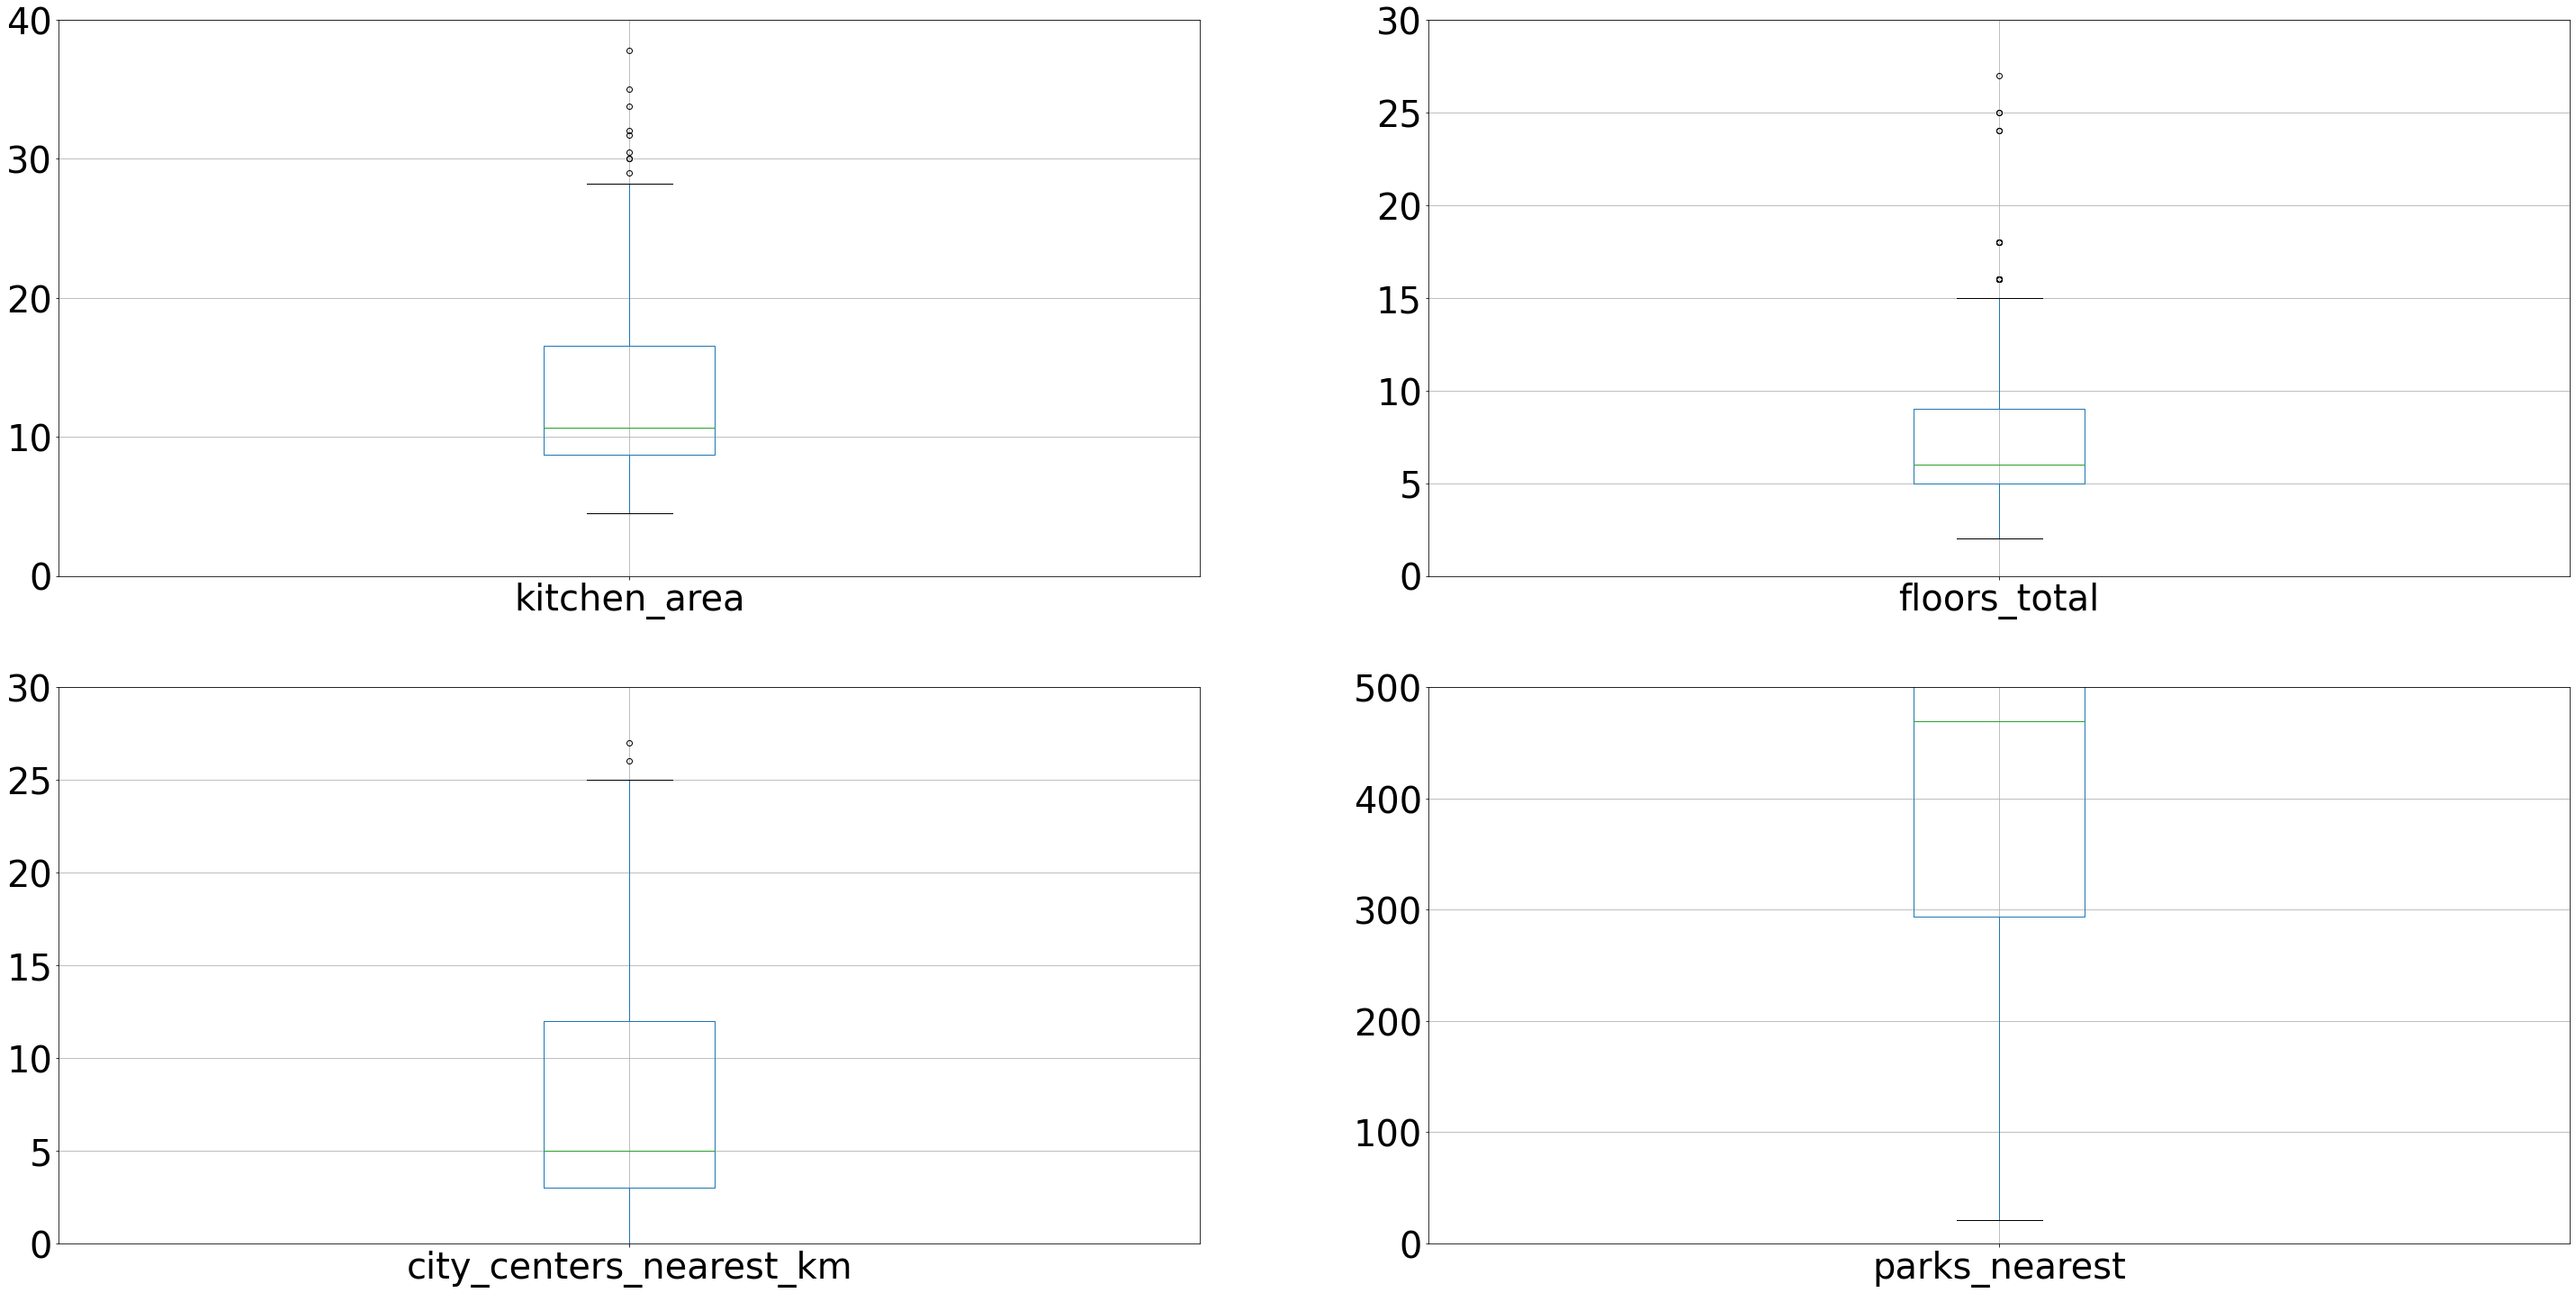

In [57]:
import matplotlib.pyplot as plt
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols,figsize=(50,25))
column_list = ['kitchen_area','floors_total','city_centers_nearest_km','parks_nearest']
ylims = [ 40, 30, 30,500]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count+=1

(0.0, 20.0)

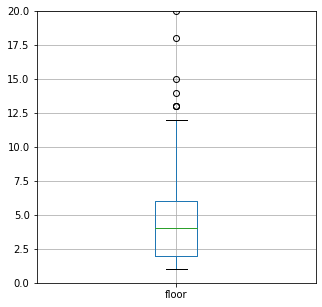

In [58]:
column=['floor']
df.boxplot(column, figsize=(5,5))
plt.ylim(0,20)

**Вывод:**
* total_area: 20-120 м^2
* last_price: 0-12 млн. р.
* rooms: 0-6 комнат
* ceiling_height: 2.5 - 2.75 м
* floor: 1-17 этажей
* kitchen_area: 2.5 - 18 м^2
* floors_total: 0 - 29 этажей
* city_centers_nearest_km: 5 - 22.5 км
* parks_nearest: 0 - 450 м 

### Построение гистограмм и их анализ**

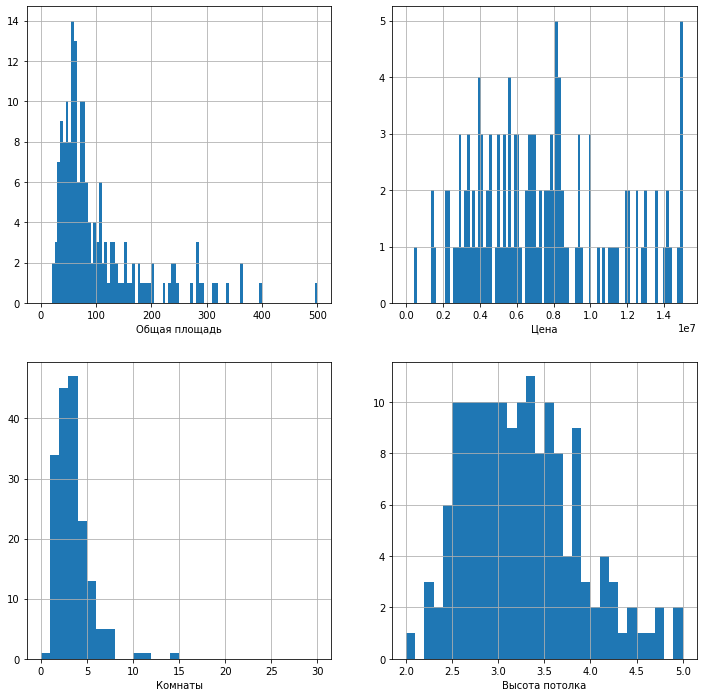

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].hist(df['total_area'],bins = 100, range = (0,500))
ax[0][0].set_xlabel('Общая площадь')
ax[0][0].grid(True)

ax[0][1].hist(df['last_price'], bins = 100, range = (0,15000000))
ax[0][1].grid(True)
ax[0][1].set_xlabel('Цена')

ax[1][0].hist(df['rooms'],bins = 30, range=(0,30))
ax[1][0].set_xlabel('Комнаты')
ax[1][0].grid(True)

ax[1][1].hist(df['ceiling_height'],bins = 30,  range = (2,5))
ax[1][1].set_xlabel('Высота потолка')
ax[1][1].grid(True)

In [60]:
df[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,176.000000,1.760000e+02,176.000000,176.000000
mean,104.277784,1.781044e+07,2.965909,3.365852
std,82.842615,2.643100e+07,1.888000,1.074074
min,22.500000,5.500000e+05,0.000000,1.000000
25%,51.950000,5.387500e+06,2.000000,2.767500
50%,73.000000,8.335000e+06,3.000000,3.215000
75%,125.675000,1.646000e+07,4.000000,3.682500
max,495.000000,1.599840e+08,14.000000,10.000000


**Вывод:**
* total_area: принимает значение от 12 до 300 м^2, среднее значение 60.3 м^2, а медианное 52 м^2ж; представлено распределение Гаусса
* last_price: принимает значение от 12 тыс. до 763 млн, среднее 6.54 млн, медиана 4.65 млн;представлено распределение Гаусса
* rooms: принимает значение от 0 до 19 комнат, среднее 2.07, медиана 2
* ceiling_height: принимает значение от 1 до 4 м, среднее 2.9, медиана 3

<div class="alert alert-info"> <b>Рассмотрение остальных пунктов</b> </div>

In [61]:
df[['living_area','kitchen_area','floor','name_floor',
    'floors_total','city_centers_nearest','airports_nearest','parks_nearest',
    'week_day_publication','month_publucation']].describe()

,living_area,kitchen_area,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest
count,163.000000,176.000000,176.000000,176.000000,176.000000,176.000000,99.000000
mean,62.960982,14.127557,4.710227,8.090909,8845.988636,26668.301136,441.989899
std,53.720675,9.572801,4.028627,6.634346,9920.722618,10051.202265,224.294836
min,13.300000,4.500000,1.000000,2.000000,0.000000,10275.000000,21.000000
25%,30.000000,8.725000,2.000000,5.000000,3152.750000,21834.000000,293.500000
50%,43.200000,10.650000,4.000000,6.000000,5123.500000,24692.500000,469.000000
75%,76.100000,16.525000,6.000000,9.000000,11891.000000,26940.250000,565.000000
max,347.500000,63.000000,26.000000,60.000000,52334.000000,69690.000000,1496.000000


**Построим гистограммы для каждого параметра**

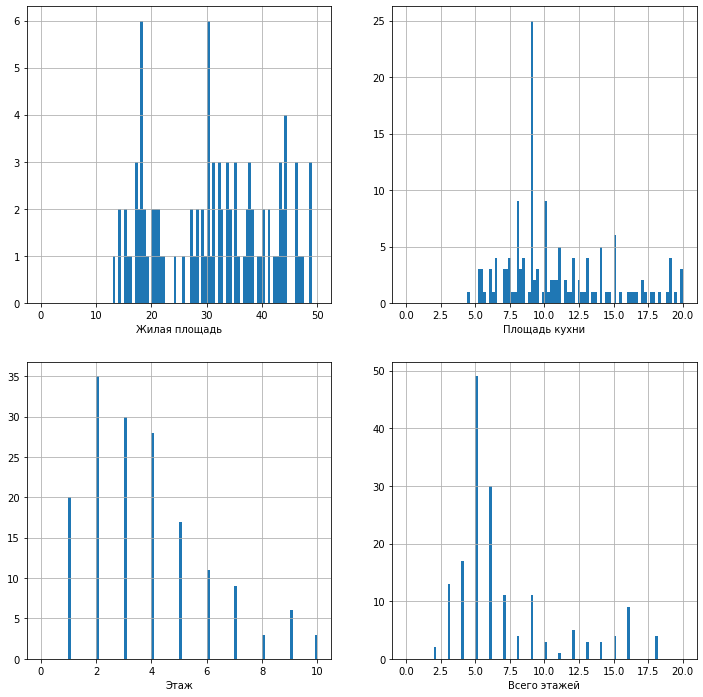

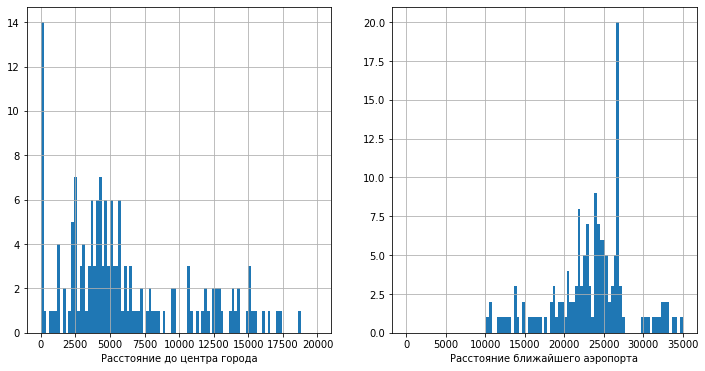

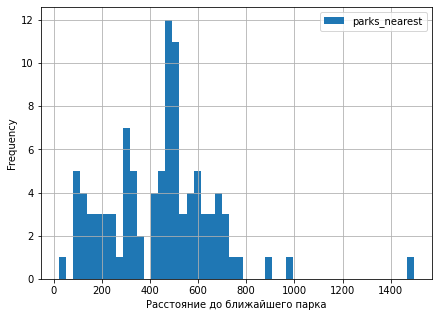

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].hist(df['living_area'],bins = 100, range = (0,50))
ax[0][0].set_xlabel('Жилая площадь')
ax[0][0].grid(True)

ax[0][1].hist(df['kitchen_area'], bins = 100, range = (0,20))
ax[0][1].grid(True)
ax[0][1].set_xlabel('Площадь кухни')

ax[1][0].hist(df['floor'],bins = 100, range=(0,10))
ax[1][0].set_xlabel('Этаж')
ax[1][0].grid(True)

ax[1][1].hist(df['floors_total'],bins = 100,  range = (0,20))
ax[1][1].set_xlabel('Всего этажей')
ax[1][1].grid(True)

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12, 6))

ax1.hist(df['city_centers_nearest'],bins = 100, range = (0,20000))
ax1.set_xlabel('Расстояние до центра города')
ax1.grid(True)

ax2.hist(df['airports_nearest'], bins = 100, range = (0,35000))
ax2.grid(True)
ax2.set_xlabel('Расстояние ближайшего аэропорта')

ax3=df.plot(y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(7,5))
ax3.set_xlabel('Расстояние до ближайшего парка')
plt.show()

**Вывод:**

параметры принимают следующие значения:
* living_area : 10 - 50 м^2
* kitchen_area: 5 - 20 м^2
* floor: 1 - 10 этаж
* floors_total: 5 - 16 этаж
* city_centers_nearest: 0 - 20000 м
* airports_nearest: 7500 - 35000 м
* parks_nearest: 1 - 1000  м

In [63]:
df[['living_area','kitchen_area','floor','name_floor',
    'floors_total','city_centers_nearest','airports_nearest','parks_nearest',
    'week_day_publication','month_publucation']].describe()

,living_area,kitchen_area,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest
count,163.000000,176.000000,176.000000,176.000000,176.000000,176.000000,99.000000
mean,62.960982,14.127557,4.710227,8.090909,8845.988636,26668.301136,441.989899
std,53.720675,9.572801,4.028627,6.634346,9920.722618,10051.202265,224.294836
min,13.300000,4.500000,1.000000,2.000000,0.000000,10275.000000,21.000000
25%,30.000000,8.725000,2.000000,5.000000,3152.750000,21834.000000,293.500000
50%,43.200000,10.650000,4.000000,6.000000,5123.500000,24692.500000,469.000000
75%,76.100000,16.525000,6.000000,9.000000,11891.000000,26940.250000,565.000000
max,347.500000,63.000000,26.000000,60.000000,52334.000000,69690.000000,1496.000000


<div class="alert alert-info">Графики по типу этажа, дню недели, месяцу</b> 

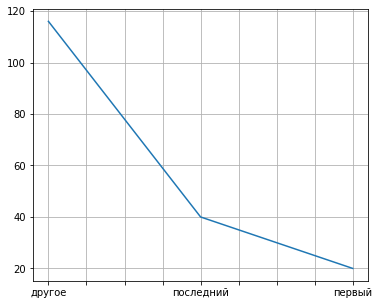

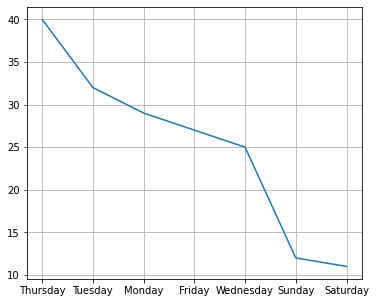

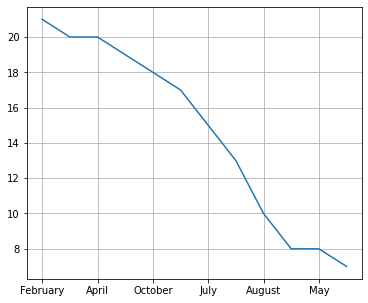

In [64]:
df['name_floor'].value_counts().plot(grid=True, figsize=(6,5))
plt.show()
df['week_day_publication'].value_counts().plot(grid=True, figsize=(6,5))
plt.show()
df['month_publucation'].value_counts().plot(grid=True, figsize=(6,5))
plt.show()

<div class="alert alert-info">Корректные графики</b> 

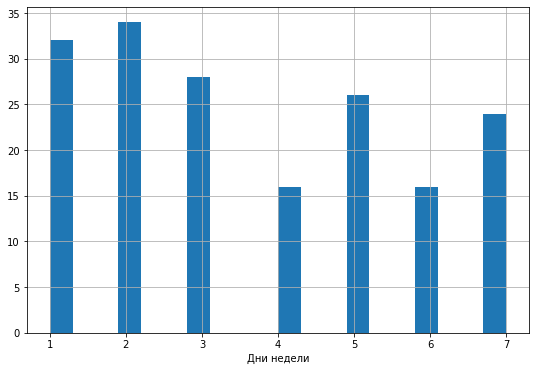

In [69]:
df['week_day_publication_2'].hist(bins=20, figsize=(9,6))
plt.xlabel('Дни недели')
plt.show()

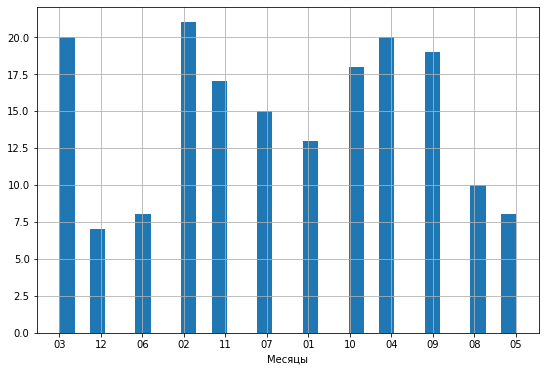

In [70]:
df['month_publucation_2'].hist(bins=30, figsize=(9,6))
plt.xlabel('Месяцы')
plt.show()

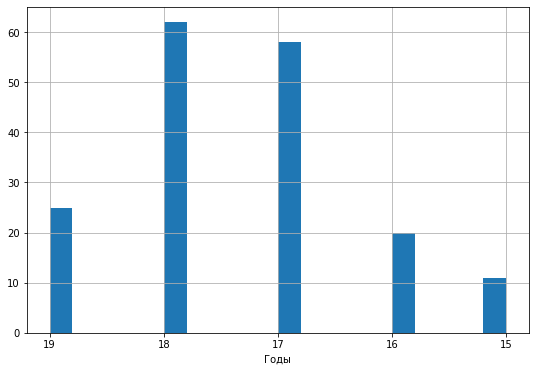

In [71]:
df['year_publication_2'].hist(bins=20, figsize=(9,6))
plt.xlabel('Годы')
plt.show()

### Исследование быстроты продаж квартир

In [72]:
df[df['days_exposition']!=0]['days_exposition'].describe()

count     141.000000
mean      239.390071
std       265.007406
min         4.000000
25%        48.000000
50%       128.000000
75%       329.000000
max      1174.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

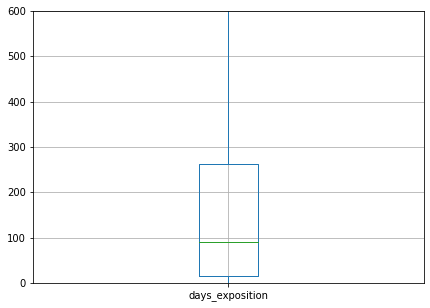

In [73]:
column=['days_exposition']
df.boxplot(column,figsize=(7,5))
plt.ylim(0,600)

Text(0.5, 1.0, 'Объявления на 100 корзин')

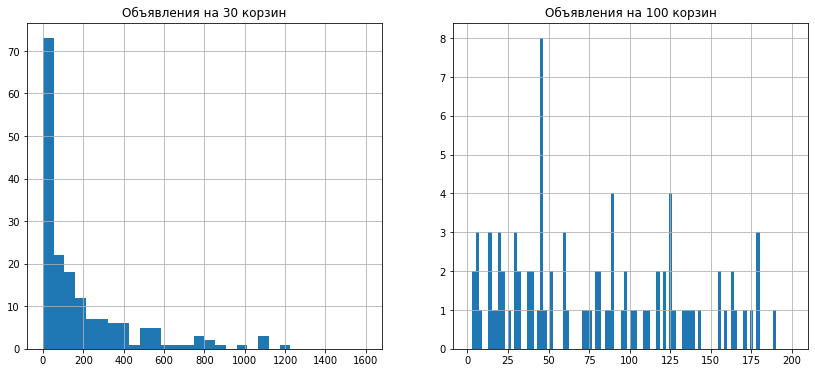

In [74]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(df['days_exposition'],bins = 30, range = (0,1600))
ax1.grid(True)
ax1.set_title('Объявления на 30 корзин')
ax2.hist(df['days_exposition'], bins = 100, range = (1,200))
ax2.grid(True)
ax2.set_title('Объявления на 100 корзин')


In [75]:
df[df['days_exposition']!=0]['days_exposition'].value_counts().head(10)


45     7
6      3
125    2
4      2
40     2
406    2
52     2
89     2
90     2
117    2
Name: days_exposition, dtype: int64

**Вывод:**
* среднее значение 180 дней, медианное 95
* c помощью гистограммы на 200 корзин и value_counts мы обнаружили, что имеются аномалии: 45,60,7,30,90 дней
* нормальные значения располагаются от 0 до 460


In [76]:
df_good = df[(df['days_exposition'] != 45) & (df['days_exposition'] != 30)
& (df['days_exposition'] != 60) & (df['days_exposition'] != 90) & (df['days_exposition'] != 7)]

(0.0, 600.0)

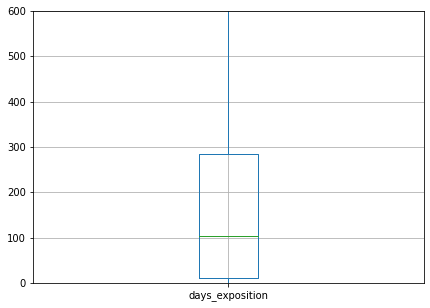

In [77]:
column=['days_exposition']
df_good.boxplot(column,figsize=(7,5))
plt.ylim(0,600)

Text(0.5, 1.0, 'Объявления на 100 корзин')

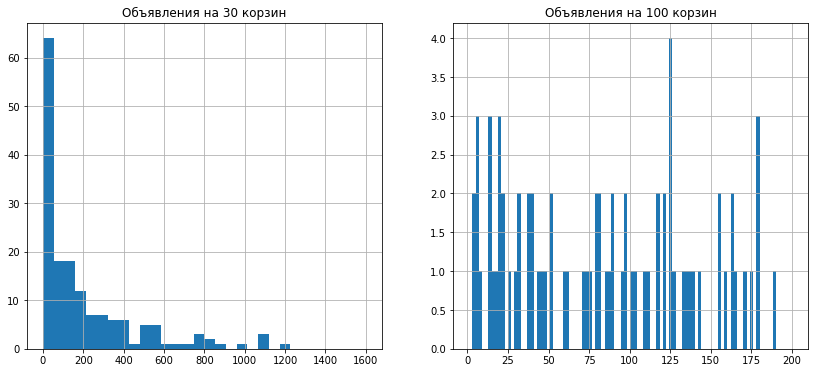

In [78]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(df_good['days_exposition'],bins = 30, range = (0,1600))
ax1.grid(True)
ax1.set_title('Объявления на 30 корзин')
ax2.hist(df_good['days_exposition'], bins = 100, range = (1,200))
ax2.grid(True)
ax2.set_title('Объявления на 100 корзин')

In [79]:
df_good['days_exposition'].describe()

count     163.000000
mean      202.938650
std       262.467392
min         0.000000
25%        10.500000
50%       104.000000
75%       283.500000
max      1174.000000
Name: days_exposition, dtype: float64

**Вывод**:
* среднее значение 167 дней(предыдущее 180), медианное 86(предыдущее 95)
* нормальные значения располагаются от 0 до 525

 <div class="alert alert-info"> 
    <b>Быстрые продажи : за 20 дней, долгие - за 218 дней </b> 
</div>

### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

#### Влияние квадратного метра жилья**

In [80]:
df['price_piece_area'].describe()

count       176.000000
mean     141484.386364
std       96527.862995
min       18966.000000
25%       93075.500000
50%      114750.500000
75%      152173.250000
max      660000.000000
Name: price_piece_area, dtype: float64

0.38444062766180503

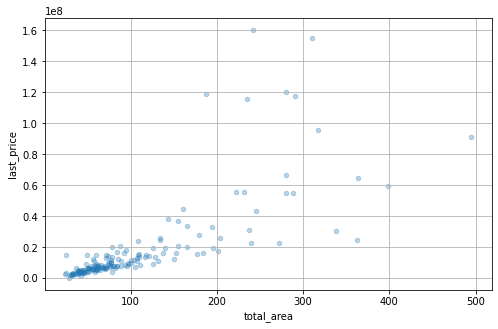

In [82]:
df_good.plot(x='total_area',y='last_price',kind='scatter',grid=True, figsize=(8,5),alpha=0.3)
df['total_area'].corr(df['price_piece_area'])

**Вывод:**
* зависимость слабая, коэффициент корелляции Пирсона равен 0.3.
* повышение площади не является гарантом, что повысится цена 

#### Влияние площади кухни**

In [83]:
df['kitchen_area'].describe()

count    176.000000
mean      14.127557
std        9.572801
min        4.500000
25%        8.725000
50%       10.650000
75%       16.525000
max       63.000000
Name: kitchen_area, dtype: float64

0.43551357331447255

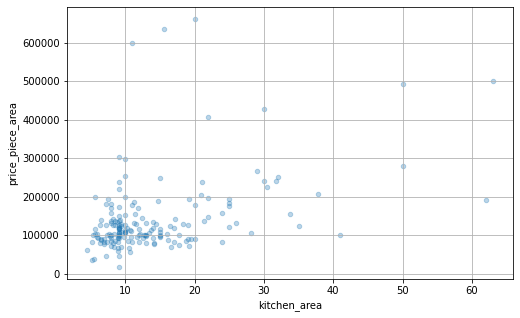

In [84]:
df.plot(x='kitchen_area',y='price_piece_area', grid=True,kind='scatter',figsize=(8,5),alpha=0.3)
df['kitchen_area'].corr(df['price_piece_area'])

**Вывод: получаем практически аналогичный результат**
* зависимость слабая, коэффициент корелляции Пирсона равен 0.36.
* повышение площади кухни не является гарантом, что повысится цена квадратного метра

#### Влияние типа этажа, на котором расположена квартира (первый, последний, другой)**

,mean,count,median
,price_piece_area,price_piece_area,price_piece_area
name_floor,,,
другое,138533.560345,116,117566.5
первый,101168.750000,20,89529.5
последний,170199.600000,40,116196.5


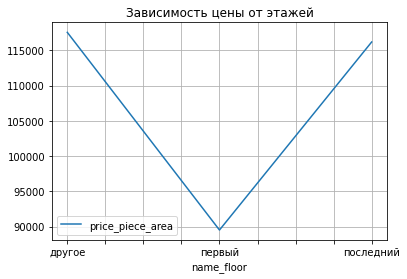

In [88]:
df_good1=df.pivot_table(index='name_floor', values='price_piece_area', aggfunc=['mean','count','median'])
df_good2=df_good1.plot(y='median',grid=True, title='Зависимость цены от этажей')
df_good1

 <div class="alert alert-info"> 
    <b>Кореляция Пирсона во всём разделе</b> 
</div>

In [89]:
df_good1.corr()

,,mean,count,median
,,price_piece_area,price_piece_area,price_piece_area
mean,price_piece_area,1.000000,0.243884,0.868156
count,price_piece_area,0.243884,1.000000,0.693036
median,price_piece_area,0.868156,0.693036,1.000000


#### Влияние количества комнат**

,mean,count,median
,price_piece_area,price_piece_area,price_piece_area
rooms,,,
0,115493.000000,1,115493.0
1,120373.176471,34,101414.5
2,122312.533333,45,106038.0
3,130598.787234,47,117355.0
4,168754.173913,23,108397.0
5,237458.846154,13,190972.0
6,184324.200000,5,99642.0
7,167534.600000,5,184848.0


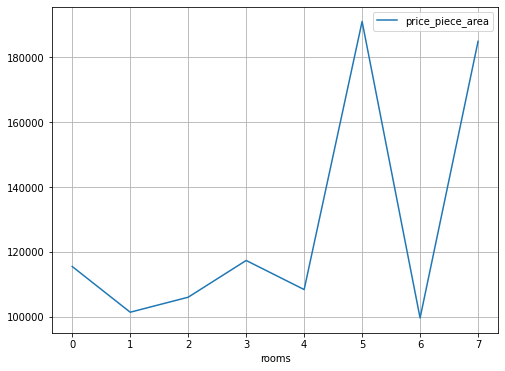

In [90]:
#Имеет смысл рассматривать количество комнат < 9, так как дальше наблюдаются выбросы значений
df_good_n=df.pivot_table(index='rooms', values='price_piece_area', aggfunc=['mean','count','median'])
df_good_n1=df_good_n.query('rooms < 9').plot(y='median',grid=True,figsize=(8,6))
df_good_n

**Вывод**
* наблюдаем поначалу странную зависимость: при увеличении количеств комнат до 3 цена непрерывно падает. Это мы можем объяснить тем, что количеств комнат 1,2,3 значительно отличается от остальных количеств. При количестве от 3 до 4 наблюдается заметный спад: в 5 раз
* дальше видим естественную картину: при увеличении комнат цена увеличивается

 <div class="alert alert-info"> 
    <b>Кореляция Пирсона во всём разделе</b> 
</div>

In [91]:
df_good_n.corr()

,,mean,count,median
,,price_piece_area,price_piece_area,price_piece_area
mean,price_piece_area,1.000000,-0.024988,0.772305
count,price_piece_area,-0.024988,1.000000,-0.132428
median,price_piece_area,0.772305,-0.132428,1.000000


#### Влияние даты размещения (день недели, месяц, год)

**День недели**

,mean,count,median
,price_piece_area,price_piece_area,price_piece_area
week_day_publication,,,
Friday,159292.703704,27,127877.0
Monday,131929.275862,29,107662.0
Saturday,107193.545455,11,93082.0
Sunday,154551.583333,12,105145.5
Thursday,148968.400000,40,118051.5
Tuesday,126300.781250,32,111725.5
Wednesday,149611.640000,25,125483.0


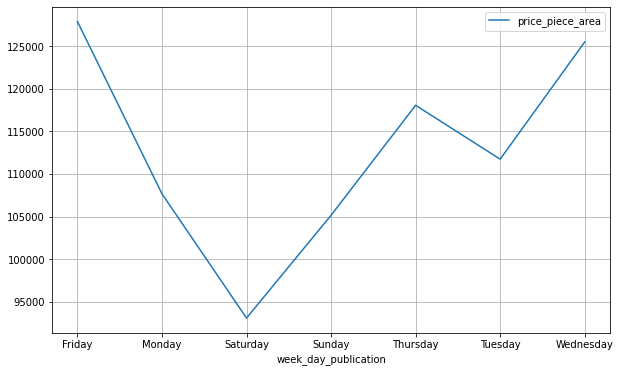

In [92]:
df_good3=df.pivot_table(index='week_day_publication', values='price_piece_area', aggfunc=['mean','count','median'])
df_good4=df_good3.plot(y='median',grid=True,figsize=(10,6))
df_good3

**Вывод:**
* цена за м^2 была меньше всего в субботу(93600), а больше всего во вторник(95750)

 <div class="alert alert-info"> 
    <b>Кореляция Пирсона во всём разделе</b> 
</div>

In [93]:
df_good3.corr()

,,mean,count,median
,,price_piece_area,price_piece_area,price_piece_area
mean,price_piece_area,1.000000,0.269055,0.771498
count,price_piece_area,0.269055,1.000000,0.595919
median,price_piece_area,0.771498,0.595919,1.000000


 **Месяц**

,mean,count,median
,price_piece_area,price_piece_area,price_piece_area
month_publucation,,,
April,148852.250000,20,130779.0
August,161108.100000,10,113618.5
December,115937.571429,7,94773.0
February,110939.476190,21,104257.0
January,109426.076923,13,114213.0
July,228191.800000,15,154232.0
June,162162.500000,8,101031.0
March,130243.600000,20,117829.0


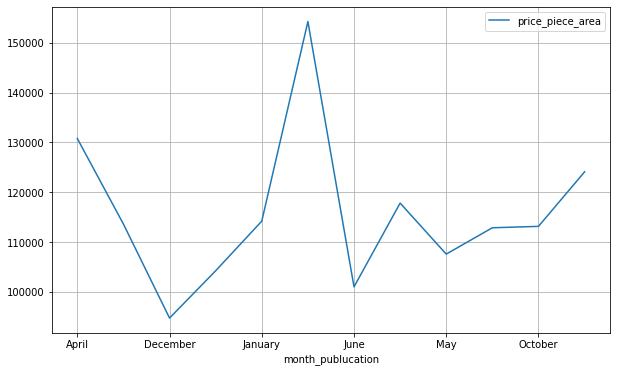

In [94]:
df_good5=df.pivot_table(index='month_publucation', values='price_piece_area', aggfunc=['mean','count','median'])
df_good6=df_good5.plot(y='median',grid=True,figsize=(10,6))
df_good5

**Вывод:**
* дешевле всего цена за м^2 была в июне(92750) и в мае(92800)
* дороже всего цена за м^2 была в апреле (96450)

 <div class="alert alert-info"> 
    <b>Кореляция Пирсона во всём разделе</b> 
</div>

In [95]:
df_good5.corr()

,,mean,count,median
,,price_piece_area,price_piece_area,price_piece_area
mean,price_piece_area,1.000000,-0.071887,0.728577
count,price_piece_area,-0.071887,1.000000,0.419981
median,price_piece_area,0.728577,0.419981,1.000000


**Год**

,mean,count,median
,price_piece_area,price_piece_area,price_piece_area
year_publication,,,
2015,185549.272727,11,107662.0
2016,142081.900000,20,116395.5
2017,142212.689655,58,113356.5
2018,143144.903226,62,110986.5
2019,115810.080000,25,119500.0


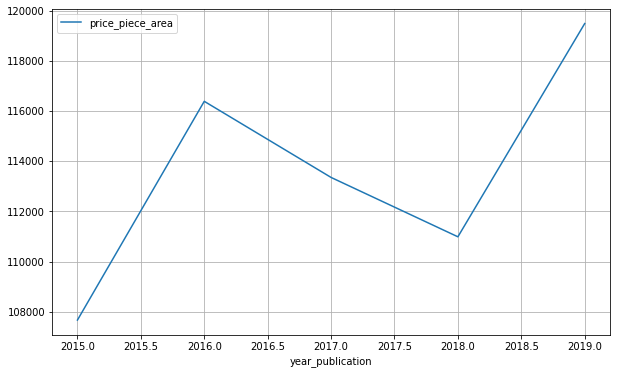

In [96]:
df_good7=df.pivot_table(index='year_publication', values='price_piece_area', aggfunc=['mean','count','median'])
df_good8=df_good7.plot(y='median',grid=True,figsize=(10,6))
df_good7

**Вывод:**
* график напоминает функцию в виде параболы ветвями вверх
* максимальная цена за м^2 была в 2014 г. ( 107000)
* минимальная цена за м^2 была в 2016 г. ( 91800) 

 <div class="alert alert-info"> 
    <b>Кореляция Пирсона во всём разделе</b> 
</div>

In [97]:
df_good7.corr()

,,mean,count,median
,,price_piece_area,price_piece_area,price_piece_area
mean,price_piece_area,1.000000,-0.323053,-0.900317
count,price_piece_area,-0.323053,1.000000,-0.080800
median,price_piece_area,-0.900317,-0.080800,1.000000


## Существенные исправления

 <div class="alert alert-info"> 
    <b>Выполнение раздела</b> 
</div>

**1.Зависимость между жилой площадью и ценой**

0.7145851345833544

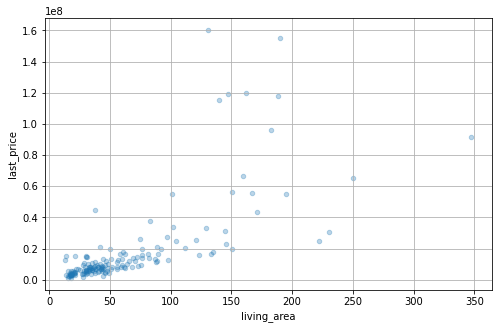

In [99]:
df.plot(x='living_area',y='last_price',kind='scatter',grid=True, figsize=(8,5),alpha=0.3)
df['living_area'].corr(df['last_price'])

**2.Зависимость между общей площадью и ценой**

0.7529818501725508

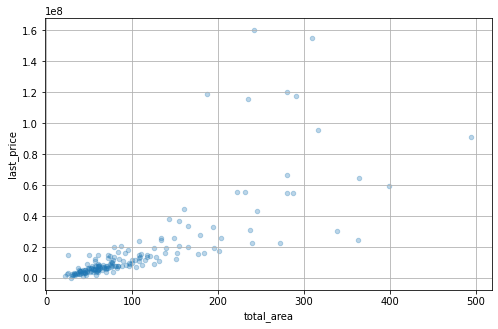

In [101]:
df.plot(x='total_area',y='last_price',kind='scatter',grid=True, figsize=(8,5),alpha=0.3)
df['total_area'].corr(df['last_price'])

**3.Зависимость между площадью кухни и ценой**

 <div class="alert alert-info"> 
    <b>С учётом типа граффика "scatter"</b> 
</div>

0.5632157280097319

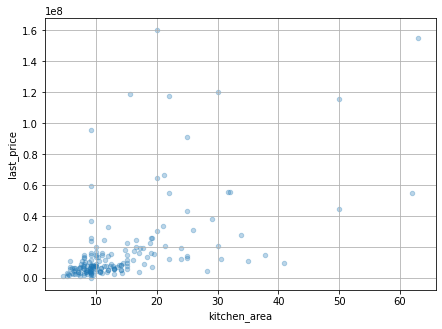

In [103]:
df.plot(x='kitchen_area',y='last_price',kind='scatter',grid=True, figsize=(7, 5),alpha=0.3)
df['kitchen_area'].corr(df['last_price'])

**Теперь изучим, как менялись  общая, кухни, жилая площади за день недели, месяц, год**

**1.День недели**

In [104]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'name_category', 'price_piece_area',
       'week_day_publication', 'month_publucation', 'year_publication',
       'week_day_publication_2', 'month_publucation_2', 'year_publication_2',
       'city_centers_nearest_km', 'name_floor'],
      dtype='object')

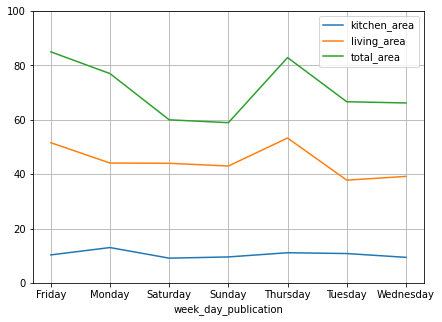

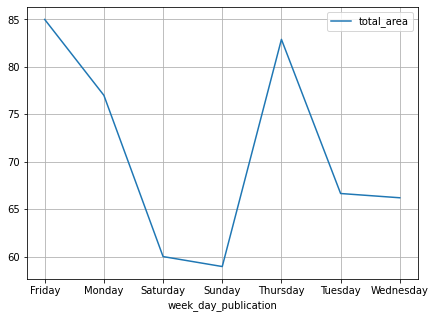

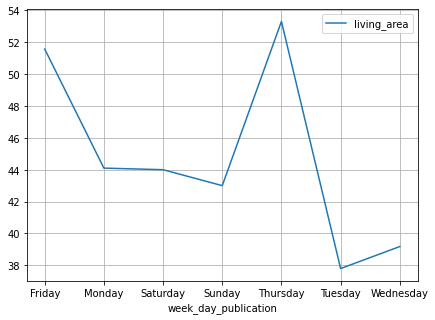

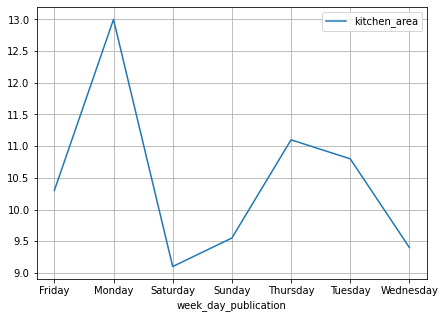

In [105]:
df_good=df.pivot_table(index='week_day_publication', values=['total_area','living_area','kitchen_area'], aggfunc=['mean','count','median'])
df_good1=df_good.plot(y='median',grid=True,figsize=(7,5))
plt.ylim(0,100)
plt.show()
df_good3=df.pivot_table(index='week_day_publication', values='total_area', aggfunc=['mean','count','median'])
df_good4=df_good3.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good5=df.pivot_table(index='week_day_publication', values='living_area', aggfunc=['mean','count','median'])
df_good6=df_good5.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good7=df.pivot_table(index='week_day_publication', values='kitchen_area', aggfunc=['mean','count','median'])
df_good8=df_good7.plot(y='median',grid=True,figsize=(7,5))
plt.show()

**Вывод:**
* total_area:
    * min значение:суббота ( 50.5 м^2)
    * max значение: четверг ( 52.8 м^2)
* living_area:
    * можно сказать, что этот график представляет собой горизонтальную прямую со значением 30 м^2 , но видим небольшое возрастание цены в среду (30.14 м^2) 
* kitchen_area:
    * график представлен в виде горизонтальной прямой, медианное значение 9.1 м^2

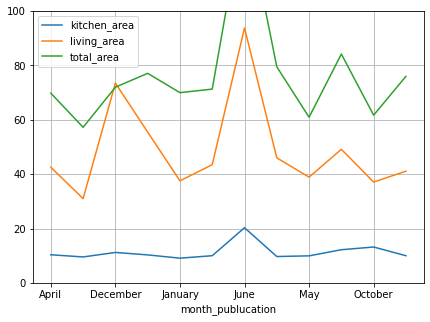

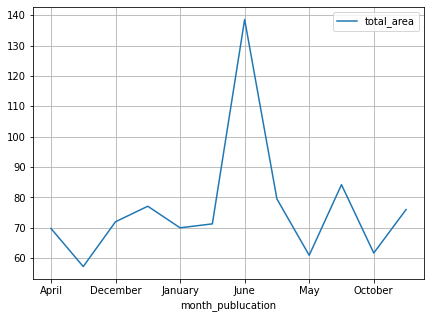

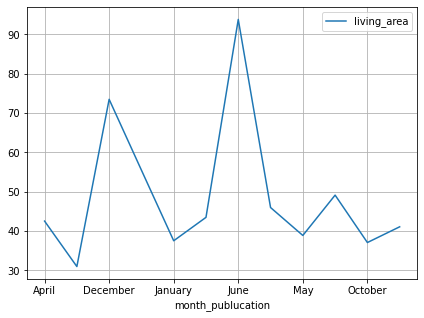

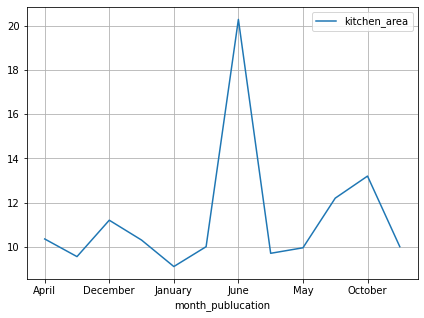

In [106]:
df_good=df.pivot_table(index='month_publucation', values=['total_area','living_area','kitchen_area'], aggfunc=['mean','count','median'])
df_good1=df_good.plot(y='median',grid=True,figsize=(7,5))
plt.ylim(0,100)
plt.show()
df_good3=df.pivot_table(index='month_publucation', values='total_area', aggfunc=['mean','count','median'])
df_good4=df_good3.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good5=df.pivot_table(index='month_publucation', values='living_area', aggfunc=['mean','count','median'])
df_good6=df_good5.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good7=df.pivot_table(index='month_publucation', values='kitchen_area', aggfunc=['mean','count','median'])
df_good8=df_good7.plot(y='median',grid=True,figsize=(7,5))
plt.show()

**Вывод:**
* total_area:
    * min значение:июнь ( 51 м^2)
    * max значение: декабрь ( 53.5 м^2)
* living_area:
    * можно сказать, что этот график представляет собой горизонтальную прямую со значением 30 м^2 ,
      но видим небольшое возрастание площади до 30.7 м^2
* kitchen_area:
    * график представлен в виде горизонтальной прямой, медианное значение 9.1 м^2

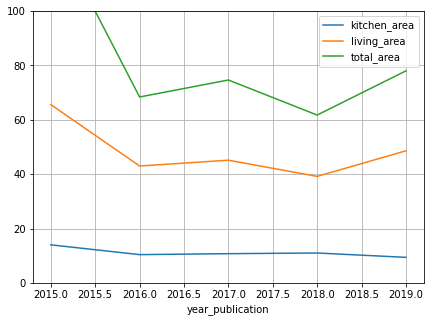

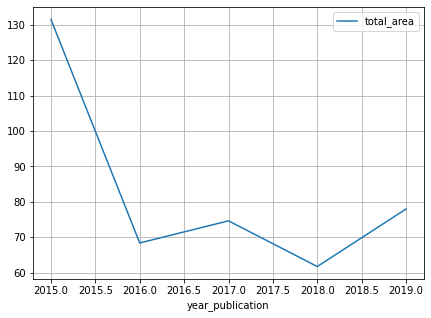

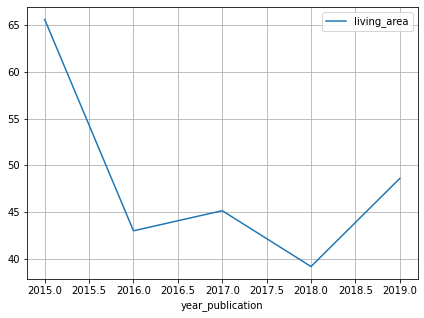

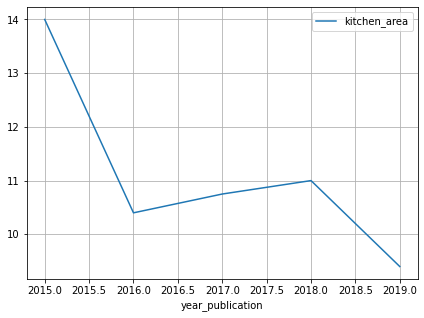

In [107]:
df_good=df.pivot_table(index='year_publication', values=['total_area','living_area','kitchen_area'], aggfunc=['mean','count','median'])
df_good1=df_good.plot(y='median',grid=True,figsize=(7,5))
plt.ylim(0,100)
plt.show()
df_good3=df.pivot_table(index='year_publication', values='total_area', aggfunc=['mean','count','median'])
df_good4=df_good3.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good5=df.pivot_table(index='year_publication', values='living_area', aggfunc=['mean','count','median'])
df_good6=df_good5.plot(y='median',grid=True,figsize=(7,5))
plt.show()
df_good7=df.pivot_table(index='year_publication', values='kitchen_area', aggfunc=['mean','count','median'])
df_good8=df_good7.plot(y='median',grid=True,figsize=(7,5))
plt.show()

**Вывод:**
* обратим внимание, что графики общей, жилой, площади кухни имеют почти одинаковую зависимость
* total_area:
    * min значение: 2018 ( 51 м^2)
    * max значение: 2014 ( 77 м^2)
* living_area:
    * min значение : 2017-2019 года (30 м^2), но в 2018 году ( 29.9 м^2)
    * max значение : 2014 ( 43 м^2)
* kitchen_area:
    * min значение: 2019 год( 9 м^2)
    * max значение: 2014 год ( 11.75 м^2)

## Исследовение населённых пунктов

In [108]:
df_good9=df.pivot_table(index='locality_name', values='price_piece_area', aggfunc=['count','mean'])
df_good9.columns=['count','mean']
df_good9=df_good9.sort_values('count',ascending = False).head(10)
df_good9


,count,mean
locality_name,,
Санкт-Петербург,147,154800.428571
Кронштадт,3,83919.333333
Петергоф,3,79502.000000
Пушкин,3,103669.000000
посёлок Шушары,2,77267.000000
посёлок Мурино,2,89760.500000
Бокситогорск,1,18966.000000
деревня Старая,1,56154.000000
посёлок городского типа Токсово,1,69231.000000


In [109]:
df_good9[df_good9['mean']==df_good9['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,147,154800.428571


In [110]:
df_good9[df_good9['mean']==df_good9['mean'].min()]

,count,mean
locality_name,,
Бокситогорск,1,18966.0


**Вывод:**
* наибольшая цена м^2 в Санкт-Петербурге
* наименьшая цена м^2 в Выборге

## Анализ расстояния до центра города

,price_piece_area
city_centers_nearest_km,
1,178802.571429
2,222020.000000
3,132259.416667
4,130429.280000
5,167431.681818
6,213494.250000
7,176061.428571
8,196364.000000
9,162826.000000


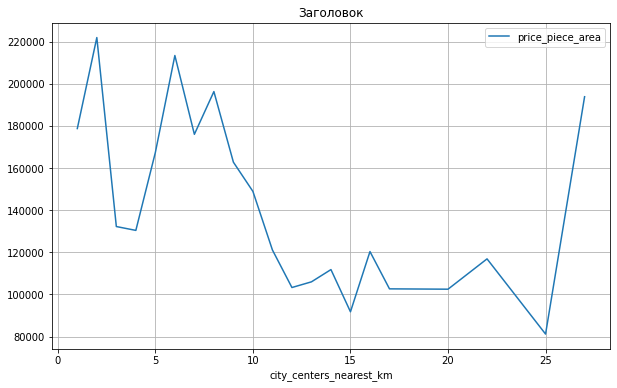

In [111]:
df_good10=(df
.query('locality_name=="Санкт-Петербург"and city_centers_nearest_km!=0')
.pivot_table(index='city_centers_nearest_km',values='price_piece_area', aggfunc='mean'))
df_good10.plot(grid=True, figsize=(10,6), title = 'Заголовок')
df_good10.head(10)


**Вывод:**
* имеется резкий скачок в цене за м^2 в районе 27 км от центра города (134000) - наверняка это какой-нибудь дом, расположенный в коттеджном посёлке 
* наибольшая цена за м^2 (180 - 160 тыс.) наблюдается при 0-3 км от центра города

## Общий вывод

**было проведено исследование, которое позволило выявить влияние различных факторов на себестоимость квартиры/дома. Входные данные - характеристики домов/квартир**

Перед проведением исследования были выдвинуты следующие задачи:
* Задача 1.Какие значения принимают: общая площадь, общая цена жилья, количество комнат, высота потолка, жилая площадь, площадь кухни, этаж квартиры, тип этажа квартиры, общее количество этажей, расстояние до центра города , расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления
* Задача 2.За какое количество дней обычно продаётся квартира/дом?Какие продажи можно считать быстрыми, а какие медленными?
* Задача 3.Влияние на общую стоимость жилья жилья следующих факторов:
 * квадратный метр жилья
 * площадь кухни
 * тип этажа, на котором расположено жильё
 * количество комнат
 * дата размещения 
* Задача 3.1. 
 * Как связаны между собой общая стоимость и следующие площади : общая, жилая, кухни?
 * Как менялись эти площади за дни недели, месяцы, годы? 
* Задача 4.В каких населённых пунктах дороже всего обходится квадратный метр жилья?
* Задача 5.Как связаны между собой квадратый метр жилья и расстояние жилья от центра города?

**Имеем следующие результаты:**
* Задача 3.1.
* 1 вопрос: 
 * общая площадь и цена: коэффицинет корелляции Пирсона равен 0.65
 * жилая площадь и цена: коэффицинет корелляции Пирсона равен 0.57
 * площадь кухни  и цена: коэффицинет корелляции Пирсона равен 0.44
   * как видим, между площадью и ценой существует зависимость
* 2 вопрос: 
 * общая площадь:
   * min значение:суббота ( 50.5 м^2)
   * max значение: четверг ( 52.8 м^2) 
   * min значение:июнь ( 51 м^2)
   * max значение: декабрь ( 53.5 м^2)
   * min значение: 2018 ( 51 м^2)
   * max значение: 2014 ( 77 м^2)
 * жилая площадь :
   * можно сказать, что этот график представляет собой горизонтальную прямую со значением 30 м^2 , но видим небольшое возрастание цены в среду (30.14 м^2) 
    * можно сказать, что этот график представляет собой горизонтальную прямую со значением 30 м^2 ,но видим небольшое возрастание площади до 30.7 м^2 в апреле
   * min значение : 2017-2019 года (30 м^2), но в 2018 году ( 29.9 м^2)
   * max значение : 2014 ( 43 м^2)
 * площадь кухни : 
   * день недели: график представлен в виде горизонтальной прямой, медианное значение 9.1 м^2
   * месяц: график представлен в виде горизонтальной прямой, медианное значение 9.1 м^2
   * год :  min значение: 2019 год( 9 м^2), max значение: 2014 год ( 11.75 м^2)
* Задача 1.
 * общая площадь принимает значения от 10 до 300 м^2, 
 * общая цена жилья принимает значения от 12 тыс. до 763 млн
 * количество комнат принимает значения от 0 до 19 комнат
 * высота потолка принимает значения от 1 до 10 м
 * жилая площадь принимает значения от 18.6 - 42.3 м^2
 * площадь кухни принимает значения от 7.4  до 11.4 м^2
 * этаж квартиры принимает значения от 2 до 8 этажа
 * общее количество этажей принимает значения от 5 до 16 этажа
 * расстояние до центра города принимает значения от 2242 до 15248 м
 * расстояние до ближайшего аэропорта принимает значения от 21183 до 34327 м
 * расстояние до ближайшего парка принимает значения от 1 до 455  м 
* Задача 2.
 * среднее значение 167 дней(предыдущее 180), медианное 86(предыдущее 95)
 * нормальные значения располагаются от 0 до 525
 * быстрые продажи : за 20 дней
 * медленные продажи : за 218 дней
* Задача 3.
 * квадратный метр жилья:
     * зависимость слабая, коэффициент корелляции Пирсона равен 0.3.
     * повышение площади не является гарантом, что повысится цена квадратного метра
 * площадь кухни:
     * зависимость слабая, коэффициент корелляции Пирсона равен 0.36.
     * повышение площади кухни не является гарантом, что повысится цена квадратного метра
 * тип этажа, на котором расположено жильё:
     * квартиры на первых и последних этажах стоят дешевле, чем на других этажах 
 * количество комнат:
     * при увеличении количеств комнат до 3 цена за м^2 непрерывно падает
     * от 3 до 7 комнат цена за м^2 непрерывно увеличивается
 * дата размещения:
     * день недели:
         * цена за м^2 была меньше всего в субботу(93600), а больше всего во вторник(95750)
     * месяц:
         * дешевле всего цена за м^2 была в июне(92750) и в мае(92800),а дороже всего цена за м^2 была в апреле (96450)
     * год:
        * максимальная цена за м^2 была в 2014 г. ( 107000),а минимальная цена за м^2 была в 2016 г. ( 91800) 
        * цена с 2014 г. непрерывно падает до 2016 г, начиная с этого года она начинает расти до 2019 г.
* Задача 4.
 * наибольшая цена м^2 в Санкт-Петербурге, а наименьшая цена м^2 в Выборге
* Задача 5.
 * наибольшая цена за м^2 (180 - 160 тыс.) наблюдается при 0-3 км от центра города


**Чек-лист готовности проекта**


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод